In [1]:
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!unzip /content/268833_611395_compressed_AB_NYC_2019.csv.zip

Archive:  /content/268833_611395_compressed_AB_NYC_2019.csv.zip
  inflating: AB_NYC_2019.csv         


In [3]:
df = pd.read_csv('AB_NYC_2019.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.shape

(48895, 16)

In [6]:
# Encode data

encoder = OneHotEncoder()
label_encoder = LabelEncoder()

In [18]:
df.drop('last_review', axis=1, inplace=True)

In [19]:
df.dropna(inplace=True)

In [20]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,9933,2787,4303,1,107,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2595,30014,2845,4120,2,126,40.75362,-73.98377,0,225,1,45,0.38,2,355
3,3831,11945,4869,5363,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,5022,15102,7192,5114,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0
5,5099,19649,7322,1666,2,136,40.74767,-73.97500,0,200,3,74,0.59,1,129


In [21]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [22]:
words = ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']

In [23]:
for col in words:
  df[col] = label_encoder.fit_transform(df[col])
  df[col] = df[col].astype(int)

In [24]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,9933,2787,4303,1,107,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2595,30014,2845,4120,2,126,40.75362,-73.98377,0,225,1,45,0.38,2,355
3,3831,11945,4869,5363,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,5022,15102,7192,5114,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0
5,5099,19649,7322,1666,2,136,40.74767,-73.97500,0,200,3,74,0.59,1,129


In [25]:
train, test = train_test_split(df, test_size=0.045, random_state=42)

print(f'train: {train.shape}')
print(f'test: {test.shape}\n')

X_train = train.drop(columns='price')
y_train = train['price']
X_test = test.drop(columns='price')
y_test = test['price']

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

train: (37074, 15)
test: (1747, 15)

X_train shape: (37074, 14)
y_train shape: (37074,)
X_test shape: (1747, 14)
y_test shape: (1747,)


In [26]:
df.head()
#ordinal or one hot for group, one hot neigh? 
#ordinal or one hot room type

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,9933,2787,4303,1,107,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2595,30014,2845,4120,2,126,40.75362,-73.98377,0,225,1,45,0.38,2,355
3,3831,11945,4869,5363,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,5022,15102,7192,5114,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0
5,5099,19649,7322,1666,2,136,40.74767,-73.97500,0,200,3,74,0.59,1,129


In [27]:
# Normalize the data

sc = StandardScaler()
X = sc.fit_transform(X_train)

In [28]:
# Model

inputs = X.shape[1]

model = Sequential()

# Add to model

model.add(Dense(32, activation='relu', input_dim=inputs))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mse', optimizer='RMSprop', metrics=['mae'])

# Fit model
model.fit(X, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1159/1159 [==============================] - 3s 2ms/step - loss: 41860.2422 - mae: 81.0506
Epoch 2/10
1159/1159 [==============================] - 3s 2ms/step - loss: 34629.0391 - mae: 59.8362
Epoch 3/10
1159/1159 [==============================] - 3s 2ms/step - loss: 34493.7227 - mae: 58.9353
Epoch 4/10
1159/1159 [==============================] - 3s 2ms/step - loss: 34397.2148 - mae: 58.6928
Epoch 5/10
1159/1159 [==============================] - 3s 2ms/step - loss: 34338.3789 - mae: 58.2178
Epoch 6/10
1159/1159 [==============================] - 3s 2ms/step - loss: 34305.4062 - mae: 57.7408
Epoch 7/10
1159/1159 [==============================] - 3s 2ms/step - loss: 34257.5273 - mae: 57.6434
Epoch 8/10
1159/1159 [==============================] - 3s 2ms/step - loss: 34234.7188 - mae: 57.3956
Epoch 9/10
1159/1159 [==============================] - 3s 2ms/step - loss: 34201.6602 - mae: 57.4120
Epoch 10/10
1159/1159 [==============================] - 3s 2ms/step - loss: 34175

In [29]:
# find baseline to begin with

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### Make into own work ###

In [31]:
### VISUALIZATIONS ###
import matplotlib.image as mpimg

sub_500 = df[df.price < 500]

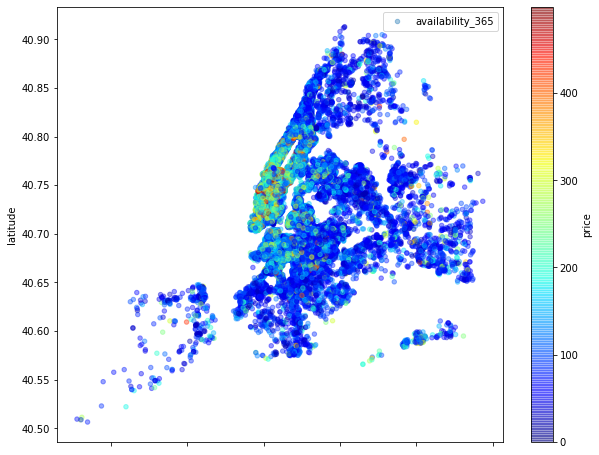

In [33]:
heat_map = sub_500.plot(kind='scatter', x='longitude', y='latitude',
                        label='availability_365', c='price',
                        cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,
                        figsize=(10, 8))

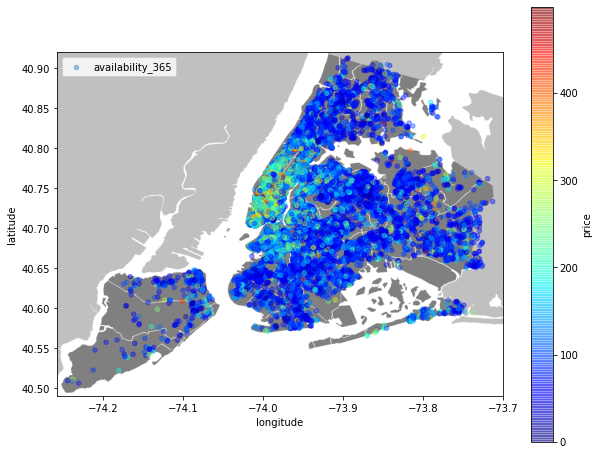

In [36]:
# Heat map w/ NYC picture

import urllib

plt.figure(figsize=(10,8))

i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)

plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()


sub_500.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

In [ ]:
# TASKS

# 1) Work on visualizations
# 2) Find baseline?
# 3) Continue to tune model
# 4) Combine with another dataset?